In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer

In [ ]:
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("sign_mnist_train.csv")

In [11]:
data_train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195


In [12]:
data_test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222


In [13]:
# img is label here 
def show_img(img,df):
    label = data_test['label'][img]
    #specific value in specific location in a df
    pixels = data_test.iloc[img, 1:]
    pixels = np.array(pixels, dtype = 'uint8')
    pixels = pixels.reshape((28,28))
    
    plt.title('label is {}'.format(label))
    plt.imshow(pixels,cmap ='gray')
    plt.show()

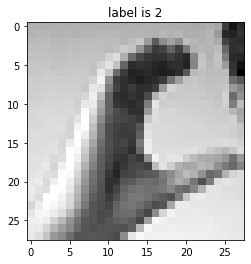

In [14]:
show_img(20,data_test)

In [15]:
y_test=data_test['label']
del data_test['label']

In [16]:
y_train=data_train['label']
del data_train['label']

In [21]:

#Label Binarizer

label_binarizer=LabelBinarizer()

y_test=label_binarizer.fit_transform(y_test)
y_train=label_binarizer.fit_transform(y_train)

x_train = data_train.values
x_test=data_test.values

#normalization

x_train = x_train/255
x_test=x_test/255

#reshape
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [22]:
data_generator = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)
data_generator.fit(x_train)

In [23]:
model = Sequential()
model.add(Conv2D(75,(3,3),strides =1, padding='same', activation ='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides =2, padding='same'))

model.add(Conv2D(50,(3,3),strides =2, padding='same', activation ='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides =2, padding='same'))

model.add(Conv2D(25,(3,3),strides =1, padding='same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides =2, padding='same'))
model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=24, activation='relu'))


In [30]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [25]:
learning_rate = ReduceLROnPlateau(monitor ='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [31]:
model.fit(data_generator.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate])

Epoch 1/20
215/215 [==============================] - 29s 136ms/step - loss: nan - accuracy: 0.2995 - val_loss: nan - val_accuracy: 0.0462
Epoch 2/20
215/215 [==============================] - 29s 134ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0462
Epoch 3/20
215/215 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0410
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 29s 134ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0462
Epoch 4/20
215/215 [==============================] - 29s 134ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0462
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0410
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
215/215 [==============================] - 29s 137ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - va

In [32]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0462


[nan, 0.04615170136094093]

In [35]:
predictions = model.predict_classes(x_test)
# Dataset doesn;t contain 9 and 25 alphabet
for i in range(len(predictions)):
    if (predictions[i] >= 9 or predictions[i]>=25):
        predictions[i] += 1
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
model.save('hand_gesture.h5')

In [37]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
